In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import sys
sys.path.append('/depot/tdm-musafe/apps')
from make_features import load_data
from make_features.transformations import batch
incidents, acceleration = load_data(drop_batches = False)

Here we demonstrate what the batch function does. This should make it clear why we expect different behavior from batched data, and when it would be appropriate to remove it.

-Alden

In [2]:
b = batch(incidents) > -1

Recall that when looking at occurrence versus confirmation times, we see a pattern where some employers do all their classifications at once:

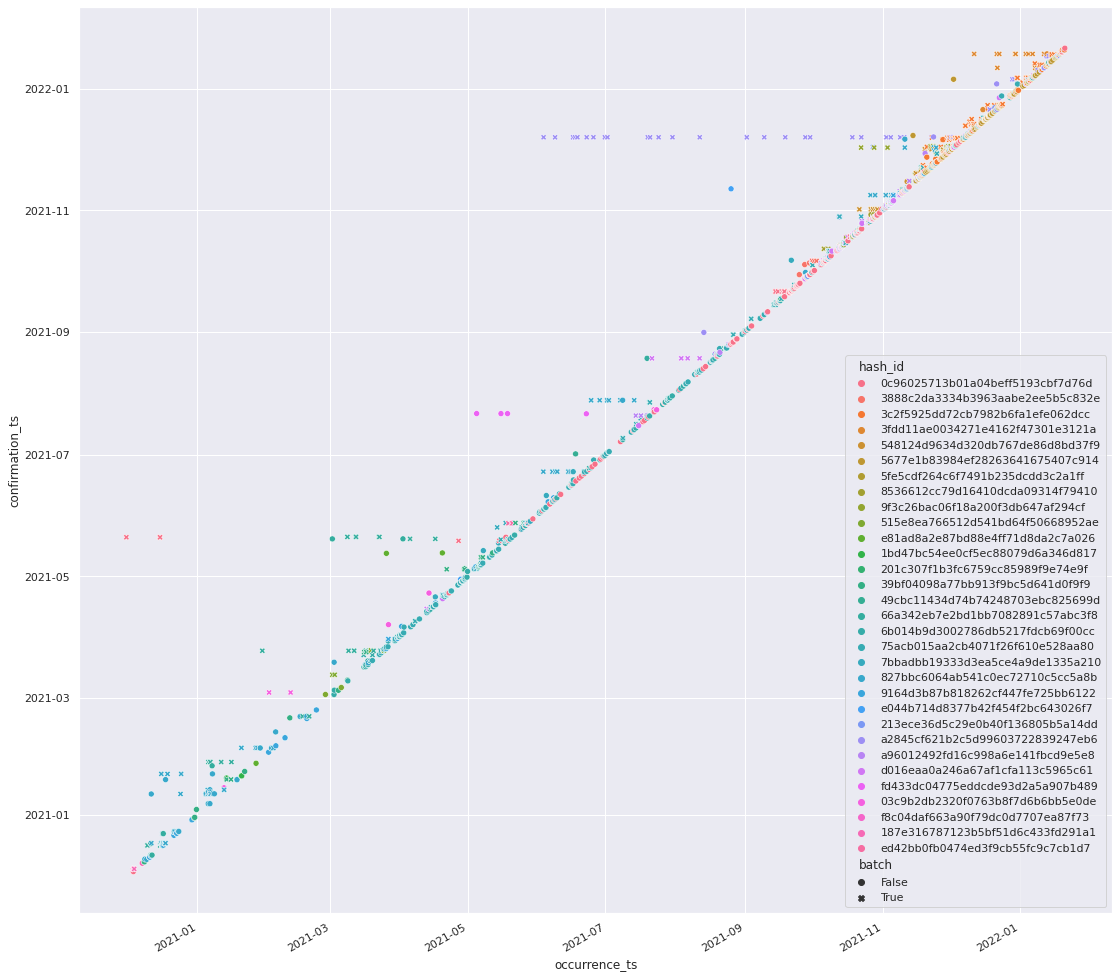

In [3]:
fig, ax = plt.subplots()
sns.scatterplot(data = incidents, x='occurrence_ts', y='confirmation_ts', hue='hash_id', ax=ax, style=b)
fig.set_size_inches(18.5, 18.5)
fig.autofmt_xdate()
plt.show()

On a logarithmic plot, those horizontal lines become curves. By looking at the time-to-confirmation, we can get a better view of the points close to the diagonal.

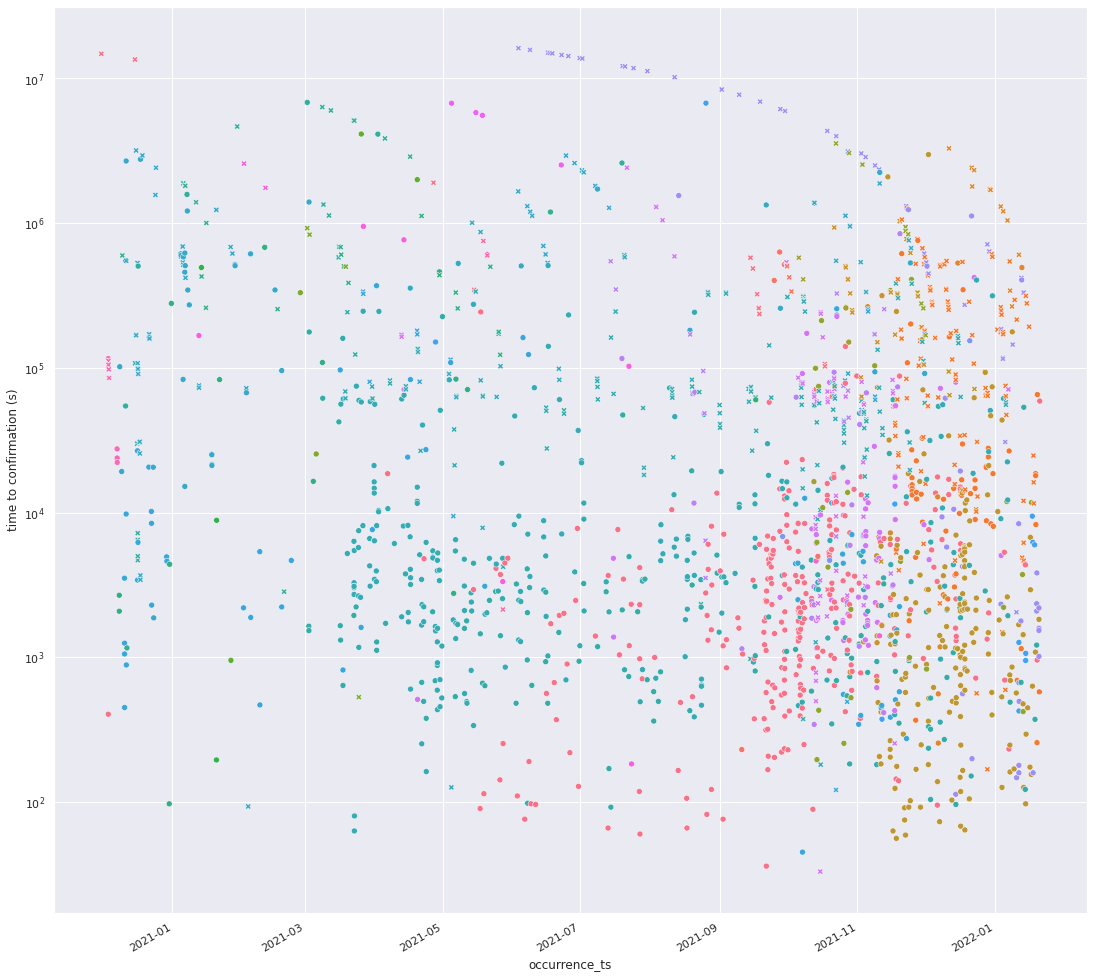

In [4]:
incidents['time to confirmation (s)'] = (incidents['confirmation_ts'] - incidents['occurrence_ts'])/pd.Timedelta('1s')

fig, ax = plt.subplots()
sns.scatterplot(data = incidents, x='occurrence_ts', y='time to confirmation (s)', hue='hash_id', style=b)
ax.set_yscale('log')
ax.get_legend().remove()
fig.set_size_inches(18.5, 18.5)
fig.autofmt_xdate()
plt.show()

We can get a better view by looking at the batch data and non-batch data separately.

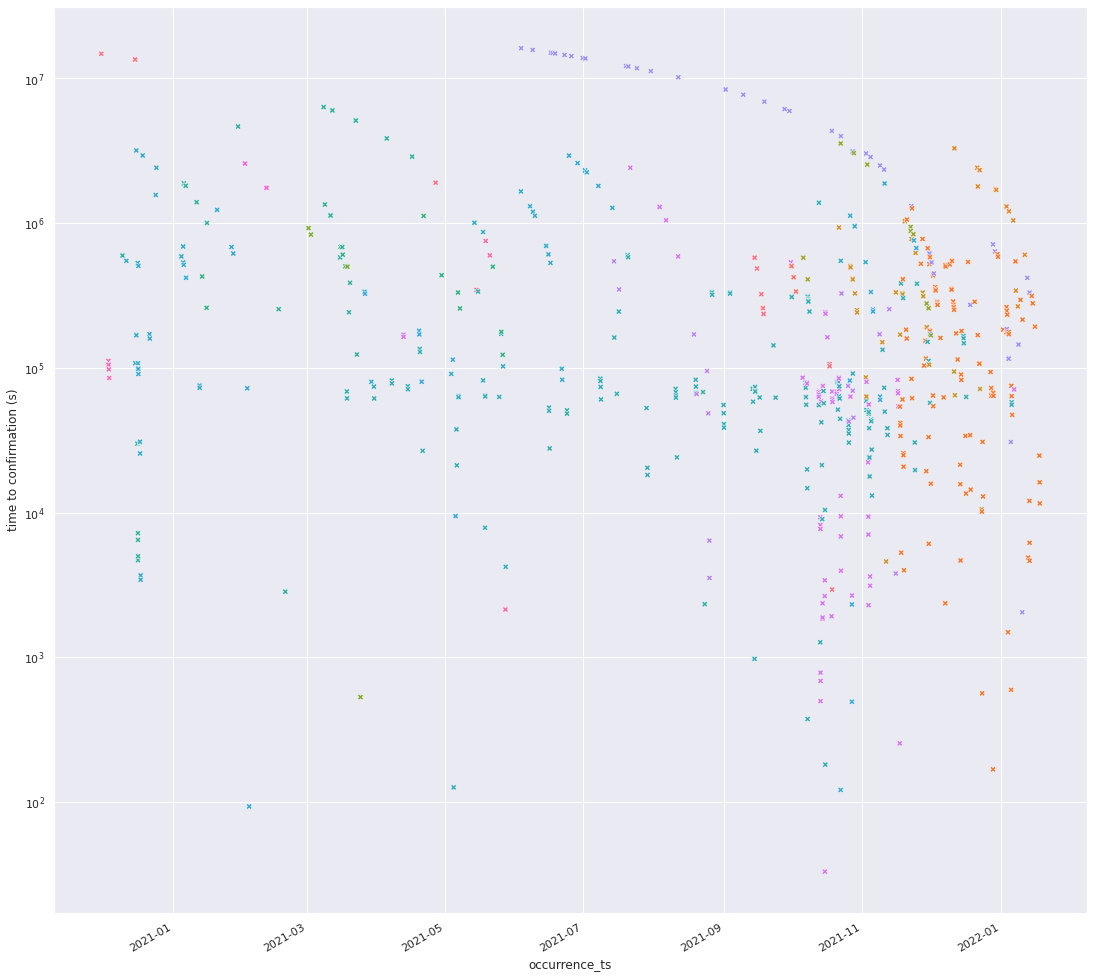

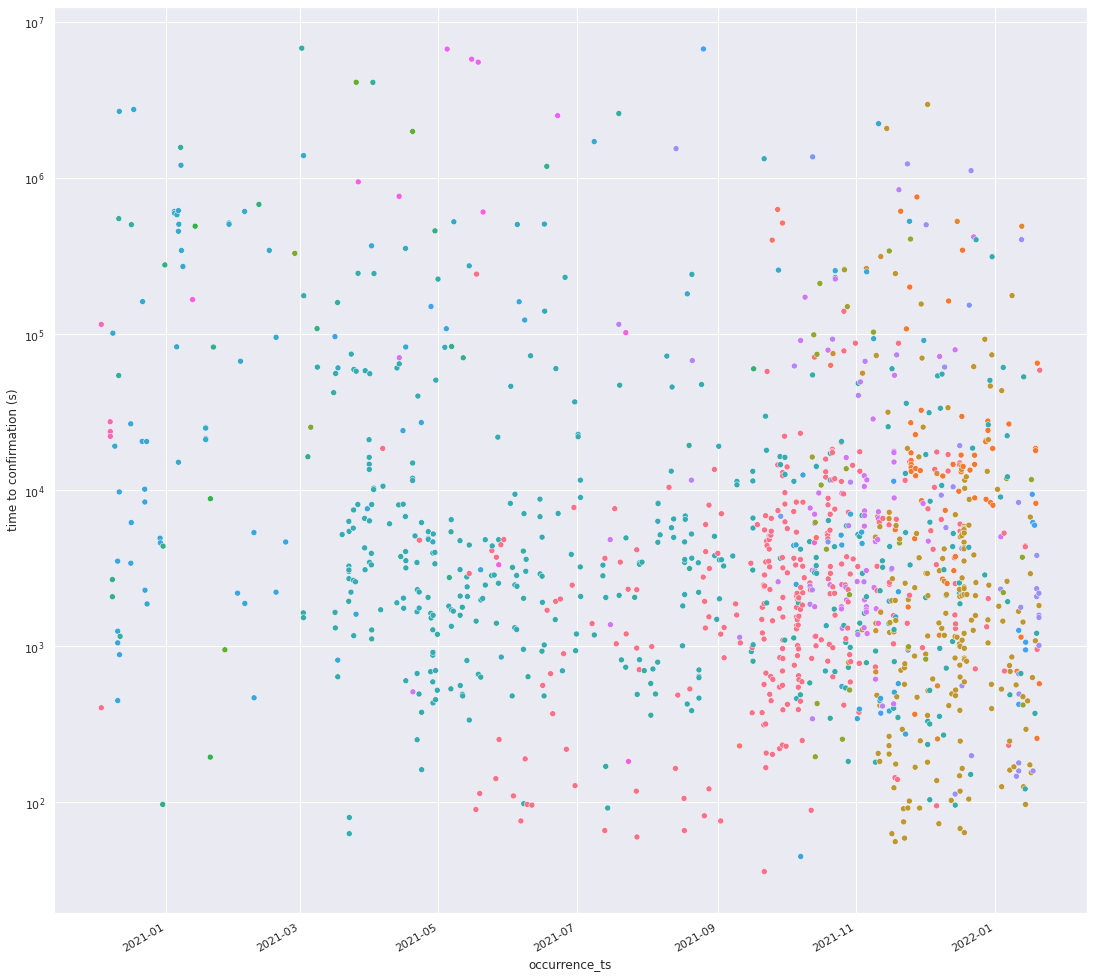

In [5]:
for data in [incidents[b], incidents[~b]]:
    fig, ax = plt.subplots()
    sns.scatterplot(data = data, x='occurrence_ts', y='time to confirmation (s)', hue='hash_id', style=b)
    ax.set_yscale('log')
    ax.get_legend().remove()
    fig.set_size_inches(18.5, 18.5)
    fig.autofmt_xdate()
    plt.show()

I hope this has made it clear what the difference is.